# Airlines Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (1).xlsx


In [5]:
Air=pd.read_excel("Airlines+Data.xlsx")
Air.head(10)

Month  Passengers
0 1995-01-01         112
1 1995-02-01         118
2 1995-03-01         132
3 1995-04-01         129
4 1995-05-01         121
5 1995-06-01         135
6 1995-07-01         148
7 1995-08-01         148
8 1995-09-01         136
9 1995-10-01         119

In [6]:
Air.shape

(96, 2)

In [7]:
Air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [8]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
Air.describe()

Month  Passengers
count                   96   96.000000
mean   1998-12-16 05:00:00  213.708333
min    1995-01-01 00:00:00  104.000000
25%    1996-12-24 06:00:00  156.000000
50%    1998-12-16 12:00:00  200.000000
75%    2000-12-08 18:00:00  264.750000
max    2002-12-01 00:00:00  413.000000
std                    NaN   71.918216

<Axes: >

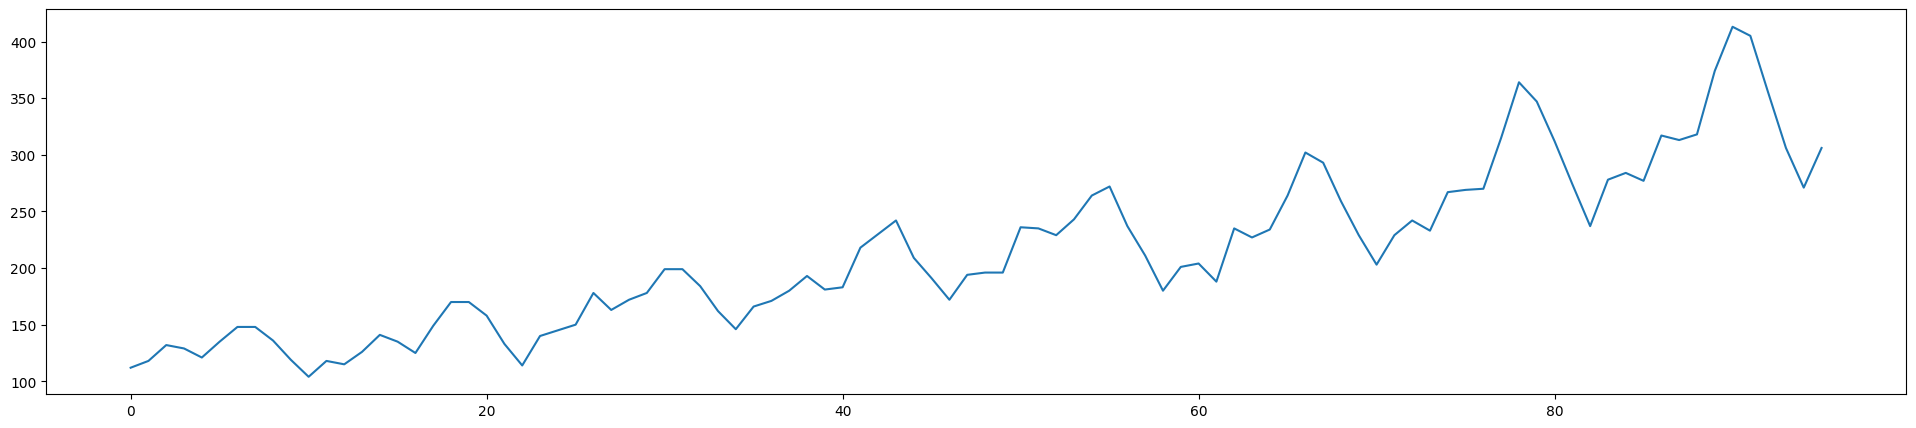

In [10]:
# Graphical visualization
plt.figure(figsize=(24,5))
Air.Passengers.plot()

In [13]:
Air["Date"] = pd.to_datetime(Air.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using Date functions from pandas

Air["month"] = Air.Date.dt.strftime("%b") # month extraction
Air["year"] = Air.Date.dt.strftime("%y") # year extraction

#Air["Day"] = Air.Date.dt.strftime("%d") # Day extraction
#Air["wkday"] = Air.Date.dt.strftime("%A") # weekday extraction
Air

Month  Passengers       Date month year
0  1995-01-01         112 1995-01-01   Jan   95
1  1995-02-01         118 1995-02-01   Feb   95
2  1995-03-01         132 1995-03-01   Mar   95
3  1995-04-01         129 1995-04-01   Apr   95
4  1995-05-01         121 1995-05-01   May   95
..        ...         ...        ...   ...  ...
91 2002-08-01         405 2002-08-01   Aug   02
92 2002-09-01         355 2002-09-01   Sep   02
93 2002-10-01         306 2002-10-01   Oct   02
94 2002-11-01         271 2002-11-01   Nov   02
95 2002-12-01         306 2002-12-01   Dec   02

[96 rows x 5 columns]

Passengers    Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May  \
0          112  False  False  False  False   True  False  False  False  False   
1          118  False  False  False   True  False  False  False  False  False   
2          132  False  False  False  False  False  False  False   True  False   
3          129   True  False  False  False  False  False  False  False  False   
4          121  False  False  False  False  False  False  False  False   True   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
91         405  False   True  False  False  False  False  False  False  False   
92         355  False  False  False  False  False  False  False  False  False   
93         306  False  False  False  False  False  False  False  False  False   
94         271  False  False  False  False  False  False  False  False  False   
95         306  False  False   True  False  False  False  False  False  False   

      Nov    Oct    Sep   t  t_square  log_Passengers  
0   False  False  False   1         1        4.718499  
1   False  False  False   2         4        4.770685  
2   False  False  False   3         9        4.882802  
3   False  False  False   4        16        4.859812  
4   False  False  False   5        25        4.795791  
..    ...    ...    ...  ..       ...             ...  
91  False  False  False  92      8464        6.003887  
92  False  False   True  93      8649        5.872118  
93  False   True  False  94      8836        5.723585  
94   True  False  False  95      9025        5.602119  
95  False  False  False  96      9216        5.723585  

[96 rows x 16 columns]

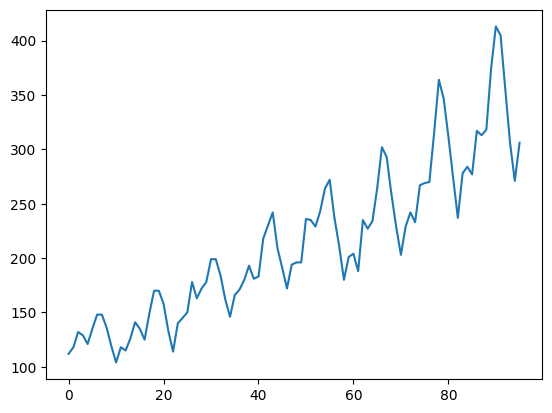

In [16]:
# Dummification for month column
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#import numpy as np
A = Air["month"][0]
A[0:3]
Air['Month']= 0

for i in range(96):
    A = Air["month"][i]
    Air['month'][i]= A[0:3]

month_dummies = pd.DataFrame(pd.get_dummies(Air['month']))
Air1 = pd.concat([Air.Passengers,month_dummies],axis = 1)

Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]
Air1.columns
Air1["log_Passengers"] = np.log(Air1["Passengers"])
Air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Air1.Passengers.plot()
Air1

In [19]:
# Splitting data into train, test and predict data
Train = Air1.head(72)
Test = Air1.iloc[72:84,:]
predict_data = Air1.tail(12)

In [20]:
Air2 = Air1.iloc[0:84,:]

In [22]:
Air1.shape, Train.shape, Test.shape, predict_data.shape

((96, 16), (72, 16), (12, 16), (12, 16))

In [23]:
# Build model and RMSE value

In [24]:
# Linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

42.786560820931676

In [25]:
# Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.781761813929904

In [26]:
# Quadratic
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.94925714948836

In [27]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

103.11431762854279

In [28]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.48137503173349

In [29]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134964

In [30]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.820420950122658

In [31]:
# Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values
6  rmse_Mult_add_sea    11.820421
4  rmse_add_sea_quad    25.481375
1           rmse_Exp    38.781762
0        rmse_linear    42.786561
2          rmse_Quad    42.949257
3       rmse_add_sea   103.114318
5      rmse_Mult_sea   108.103791

In [35]:
# Model building using Multiplicative Additive Seasonality method and predict for new time model
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air2).fit()

pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [36]:
predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)
predict_data

Passengers    Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May  \
84         284  False  False  False  False   True  False  False  False  False   
85         277  False  False  False   True  False  False  False  False  False   
86         317  False  False  False  False  False  False  False   True  False   
87         313   True  False  False  False  False  False  False  False  False   
88         318  False  False  False  False  False  False  False  False   True   
89         374  False  False  False  False  False  False   True  False  False   
90         413  False  False  False  False  False   True  False  False  False   
91         405  False   True  False  False  False  False  False  False  False   
92         355  False  False  False  False  False  False  False  False  False   
93         306  False  False  False  False  False  False  False  False  False   
94         271  False  False  False  False  False  False  False  False  False   
95         306  False  False   True  False  False  False  False  False  False   

      Nov    Oct    Sep   t  t_square  log_Passengers  forecasted_Passengers  
84  False  False  False  85      7225        5.648974               5.637978  
85  False  False  False  86      7396        5.624018               5.662487  
86  False  False  False  87      7569        5.758902               5.808210  
87  False  False  False  88      7744        5.746203               5.765280  
88  False  False  False  89      7921        5.762051               5.753323  
89  False  False  False  90      8100        5.924256               5.865720  
90  False  False  False  91      8281        6.023448               5.966763  
91  False  False  False  92      8464        6.003887               5.975173  
92  False  False   True  93      8649        5.872118               5.867869  
93  False   True  False  94      8836        5.723585               5.740788  
94   True  False  False  95      9025        5.602119               5.611277  
95  False  False  False  96      9216        5.723585               5.746501

# CocaCola Sales

In [37]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [42]:
Coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
Coca.head(20)

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995

In [43]:
Coca.shape

(42, 2)

In [44]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [46]:
Coca.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

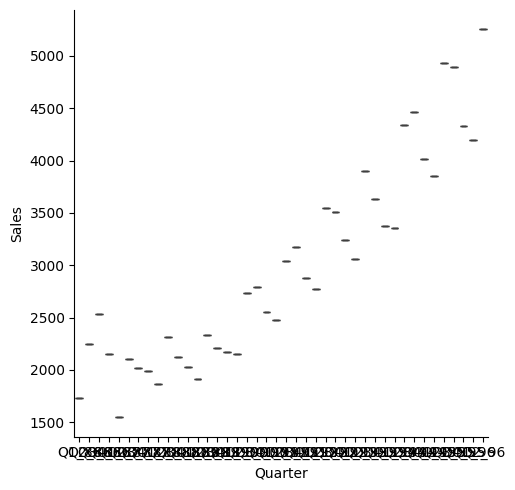

In [48]:
sns.catplot(x="Quarter",y="Sales",data=Coca,kind="box")

In [49]:
# Preprocessing
quarter=['Q1','Q2','Q3','Q4']
n=Coca['Quarter'][0]
n[0:2]

'Q1'

In [50]:
Coca['quarter']=0
for i in range(42):
    n=Coca['Quarter'][i]
    Coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(Coca['quarter']))
    coco=pd.concat((Coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales
coco

Quarter        Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
0    Q1_86  1734.827000      Q1   True  False  False  False   1         1   
1    Q2_86  2244.960999      Q2  False   True  False  False   2         4   
2    Q3_86  2533.804993      Q3  False  False   True  False   3         9   
3    Q4_86  2154.962997      Q4  False  False  False   True   4        16   
4    Q1_87  1547.818996      Q1   True  False  False  False   5        25   
5    Q2_87  2104.411995      Q2  False   True  False  False   6        36   
6    Q3_87  2014.362999      Q3  False  False   True  False   7        49   
7    Q4_87  1991.746998      Q4  False  False  False   True   8        64   
8    Q1_88  1869.049999      Q1   True  False  False  False   9        81   
9    Q2_88  2313.631996      Q2  False   True  False  False  10       100   
10   Q3_88  2128.320000      Q3  False  False   True  False  11       121   
11   Q4_88  2026.828999      Q4  False  False  False   True  12       144   
12   Q1_89  1910.603996      Q1   True  False  False  False  13       169   
13   Q2_89  2331.164993      Q2  False   True  False  False  14       196   
14   Q3_89  2206.549995      Q3  False  False   True  False  15       225   
15   Q4_89  2173.967995      Q4  False  False  False   True  16       256   
16   Q1_90  2148.278000      Q1   True  False  False  False  17       289   
17   Q2_90  2739.307999      Q2  False   True  False  False  18       324   
18   Q3_90  2792.753998      Q3  False  False   True  False  19       361   
19   Q4_90  2556.009995      Q4  False  False  False   True  20       400   
20   Q1_91  2480.973999      Q1   True  False  False  False  21       441   
21   Q2_91  3039.522995      Q2  False   True  False  False  22       484   
22   Q3_91  3172.115997      Q3  False  False   True  False  23       529   
23   Q4_91  2879.000999      Q4  False  False  False   True  24       576   
24   Q1_92  2772.000000      Q1   True  False  False  False  25       625   
25   Q2_92  3550.000000      Q2  False   True  False  False  26       676   
26   Q3_92  3508.000000      Q3  False  False   True  False  27       729   
27   Q4_92  3243.859993      Q4  False  False  False   True  28       784   
28   Q1_93  3056.000000      Q1   True  False  False  False  29       841   
29   Q2_93  3899.000000      Q2  False   True  False  False  30       900   
30   Q3_93  3629.000000      Q3  False  False   True  False  31       961   
31   Q4_93  3373.000000      Q4  False  False  False   True  32      1024   
32   Q1_94  3352.000000      Q1   True  False  False  False  33      1089   
33   Q2_94  4342.000000      Q2  False   True  False  False  34      1156   
34   Q3_94  4461.000000      Q3  False  False   True  False  35      1225   
35   Q4_94  4017.000000      Q4  False  False  False   True  36      1296   
36   Q1_95  3854.000000      Q1   True  False  False  False  37      1369   
37   Q2_95  4936.000000      Q2  False   True  False  False  38      1444   
38   Q3_95  4895.000000      Q3  False  False   True  False  39      1521   
39   Q4_95  4333.000000      Q4  False  False  False   True  40      1600   
40   Q1_96  4194.000000      Q1   True  False  False  False  41      1681   
41   Q2_96  5253.000000      Q2  False   True  False  False  42      1764   

    log_Sales  
0    7.458663  
1    7.716443  
2    7.837477  
3    7.675529  
4    7.344602  
5    7.651791  
6    7.608058  
7    7.596767  
8    7.533186  
9    7.746574  
10   7.663088  
11   7.614228  
12   7.555175  
13   7.754123  
14   7.699185  
15   7.684309  
16   7.672422  
17   7.915461  
18   7.934783  
19   7.846203  
20   7.816407  
21   8.019456  
22   8.062154  
23   7.965199  
24   7.927324  
25   8.174703  
26   8.162801  
27   8.084519  
28   8.024862  
29   8.268475  
30   8.196712  
31   8.123558  
32   8.117312  
33   8.376090  
34   8.403128  
35   8.298291  
36   8.256867  
37   8.504311  
38   8.495970  
39   8.374015  
40   8.341410  
41   8.566555

In [52]:
# Splitting Data into training data and test data
Train = coco.head(34)
Test = coco.iloc[34:38,:]
predict_data = coco.tail(4)
Coca2= coco.iloc[0:38,:]
coco.shape, Train.shape, Test.shape, predict_data.shape, Coca2.shape

((42, 10), (34, 10), (4, 10), (4, 10), (38, 10))

In [54]:
# Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

669.4685590402657

In [55]:
# Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862682

In [56]:
# Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.67472775414996

In [57]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.7389646362883

In [58]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.8861004712936

In [59]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202278

In [60]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.5642262159659

In [61]:
# Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values
4  rmse_add_sea_quad   174.886100
2          rmse_Quad   394.674728
6  rmse_Mult_add_sea   404.564226
1           rmse_Exp   564.501299
0        rmse_linear   669.468559
3       rmse_add_sea  1686.738965
5      rmse_Mult_sea  1757.774041

In [62]:
# Predict New Model
predict_data

Quarter   Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
38   Q3_95  4895.0      Q3  False  False   True  False  39      1521   
39   Q4_95  4333.0      Q4  False  False  False   True  40      1600   
40   Q1_96  4194.0      Q1   True  False  False  False  41      1681   
41   Q2_96  5253.0      Q2  False   True  False  False  42      1764   

    log_Sales  
38   8.495970  
39   8.374015  
40   8.341410  
41   8.566555

In [67]:
# Build the model using Additive Seasonality Quadratic on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Coca2).fit()

In [68]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [69]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

In [70]:
predict_data

Quarter   Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
38   Q3_95  4895.0      Q3  False  False   True  False  39      1521   
39   Q4_95  4333.0      Q4  False  False  False   True  40      1600   
40   Q1_96  4194.0      Q1   True  False  False  False  41      1681   
41   Q2_96  5253.0      Q2  False   True  False  False  42      1764   

    log_Sales  forecasted_Sales  
38   8.495970       4839.220330  
39   8.374015       4731.881928  
40   8.341410       4668.345851  
41   8.566555       5399.952382